# Gas Turbine CO and NOx Emission Data Set

## Import Dataset

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
gas_turbine_co_and_nox_emission_data_set = fetch_ucirepo(id=551)

# data (as pandas dataframes)
X = gas_turbine_co_and_nox_emission_data_set.data.features
y = gas_turbine_co_and_nox_emission_data_set.data.targets

# metadata
print(gas_turbine_co_and_nox_emission_data_set.metadata)

# variable information
print(gas_turbine_co_and_nox_emission_data_set.variables)

{'uci_id': 551, 'name': 'Gas Turbine CO and NOx Emission Data Set', 'repository_url': 'https://archive.ics.uci.edu/dataset/551/gas+turbine+co+and+nox+emission+data+set', 'data_url': 'https://archive.ics.uci.edu/static/public/551/data.csv', 'abstract': 'The dataset contains 36733 instances of 11 sensor measures aggregated over one hour, from a gas turbine located in Turkey for the purpose of studying flue gas emissions, namely CO and NOx.', 'area': 'Computer Science', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 36733, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C5WC95', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by mea

In [ ]:
import numpy as np
import pandas as pd

data = pd.concat([X, y], axis=1)

# Data summary
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    36733 non-null  int64  
 1   AT      36733 non-null  float64
 2   AP      36733 non-null  float64
 3   AH      36733 non-null  float64
 4   AFDP    36733 non-null  float64
 5   GTEP    36733 non-null  float64
 6   TIT     36733 non-null  float64
 7   TAT     36733 non-null  float64
 8   TEY     36733 non-null  float64
 9   CDP     36733 non-null  float64
 10  CO      36733 non-null  float64
 11  NOX     36733 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.4 MB
None


In [ ]:
shape = data.shape
print(shape)
data.head(5)

(36733, 12)


,year,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,2011,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,2011,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,2011,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,2011,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,2011,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


## Handeling Missing Values

In [ ]:
# Check for missing values
print(data.isnull().sum())

year    0
AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64


## Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


#### with min max scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)


## EDA

### Data Statistics

In [ ]:
print(data.describe())

               year            AT            AP            AH          AFDP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean    2012.985735     17.712726   1013.070165     77.867015      3.925518   
std        1.418965      7.447451      6.463346     14.461355      0.773936   
min     2011.000000     -6.234800    985.850000     24.085000      2.087400   
25%     2012.000000     11.781000   1008.800000     68.188000      3.355600   
50%     2013.000000     17.801000   1012.600000     80.470000      3.937700   
75%     2014.000000     23.665000   1017.000000     89.376000      4.376900   
max     2015.000000     37.103000   1036.600000    100.200000      7.610600   

               GTEP           TIT           TAT           TEY           CDP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean      25.563801   1081.428084    546.158517    133.506404     12.060525   
std        4.195957     17.536373      6.842360    

## Visulizatio

### Histogram

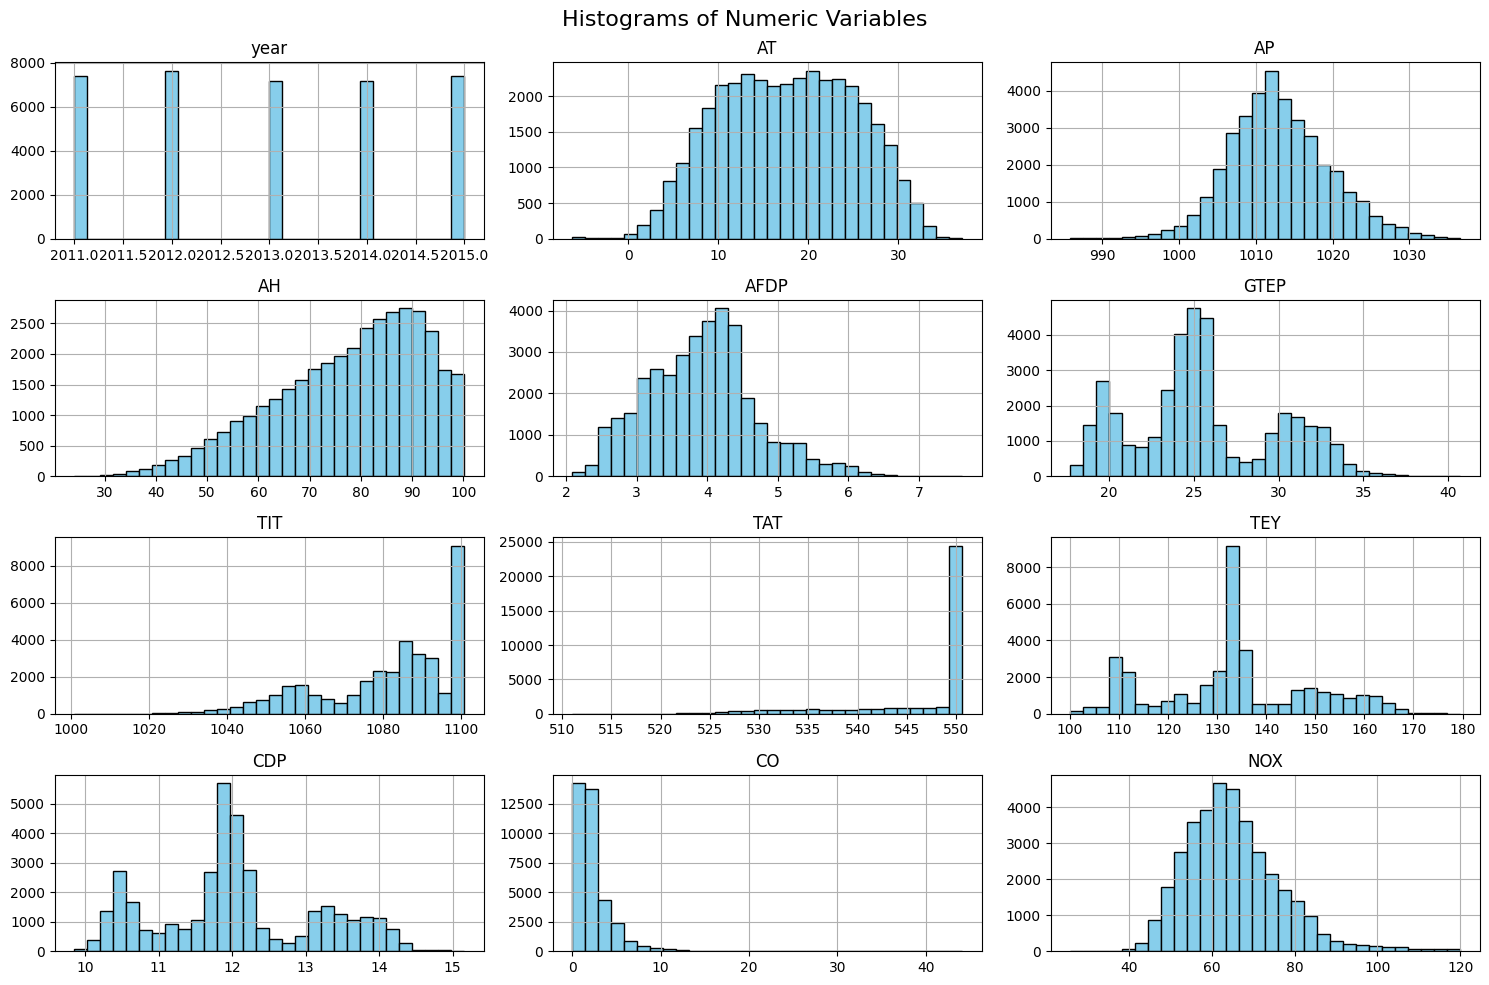

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

numeric_data = data.select_dtypes(include='number')
numeric_data.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Variables", fontsize=16)
plt.tight_layout()
plt.show()


### Box Plot

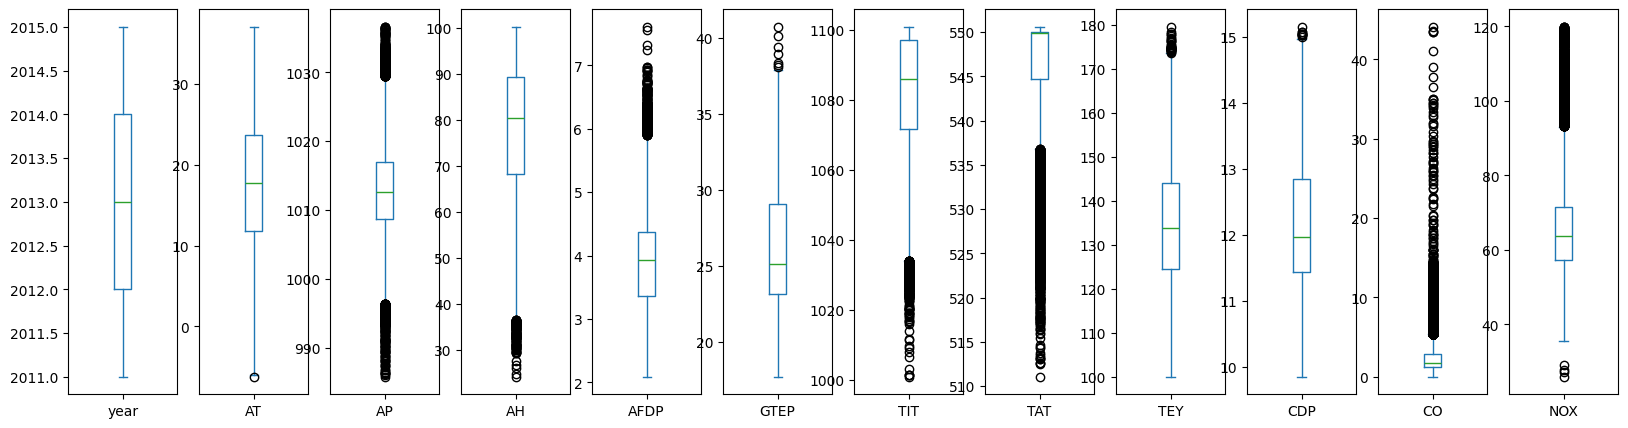

In [ ]:
data.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(20,5))
pyplot.show()

### Correlation Matrix

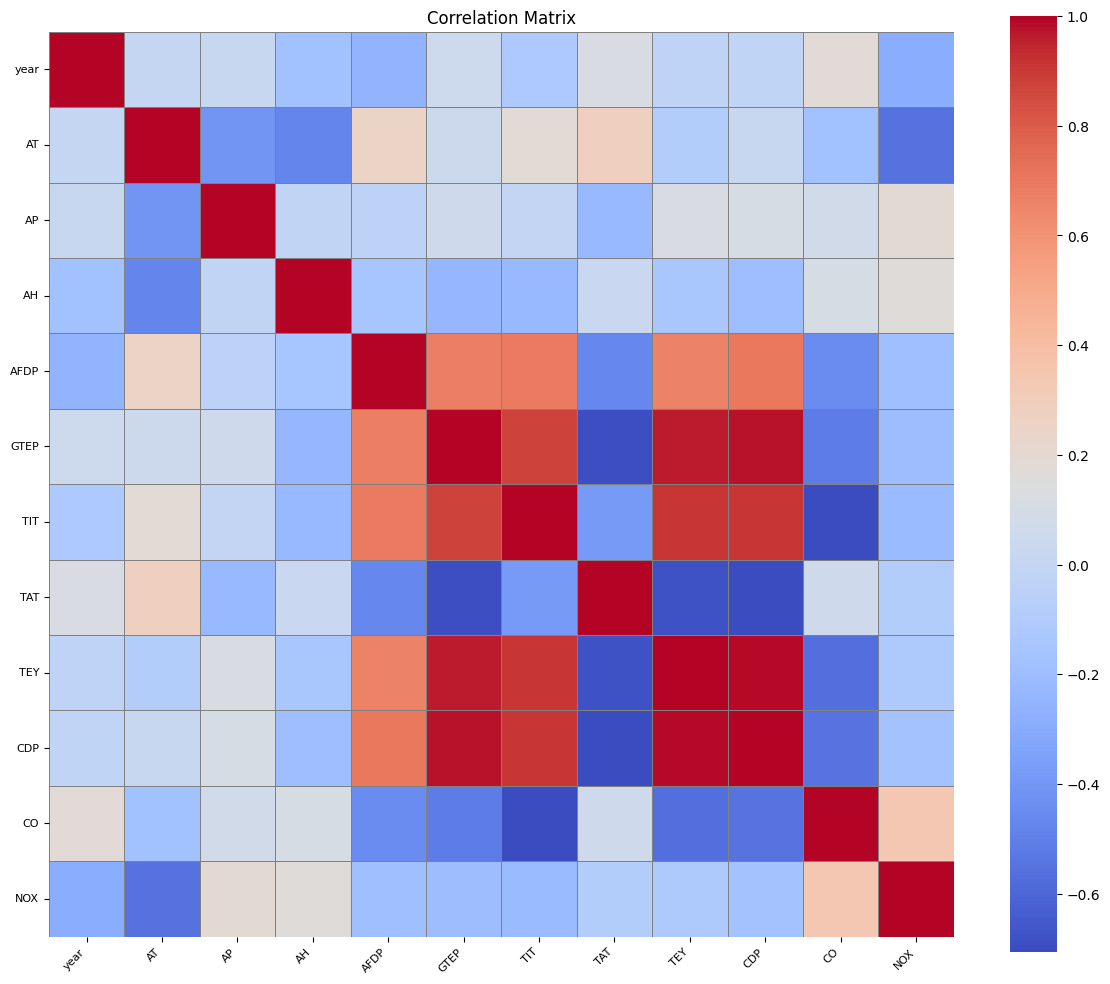

In [ ]:
numeric_data = data.select_dtypes(include='number')

corr_matrix = numeric_data.corr(method='pearson')

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', square=True,
            linewidths=0.5, linecolor='gray', cbar=True)

plt.title("Correlation Matrix")
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()


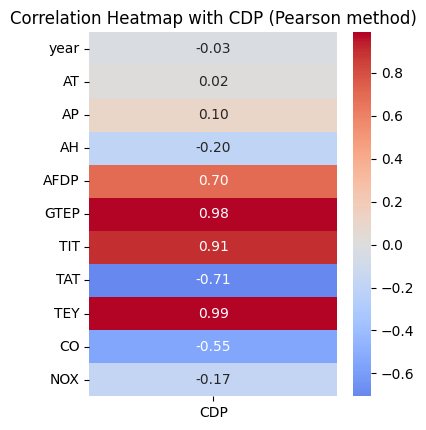

In [ ]:
methods = ['pearson']
# 'spearman', 'kendall'

for method in methods:
    corr = data.corr(method=method)[['CDP']].drop('CDP')
    plt.figure(figsize=(4, len(corr) * 0.4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, cbar=True, fmt=".2f")
    plt.title(f'Correlation Heatmap with CDP ({method.title()} method)')
    plt.tight_layout()
    plt.show()


### Scatter plot

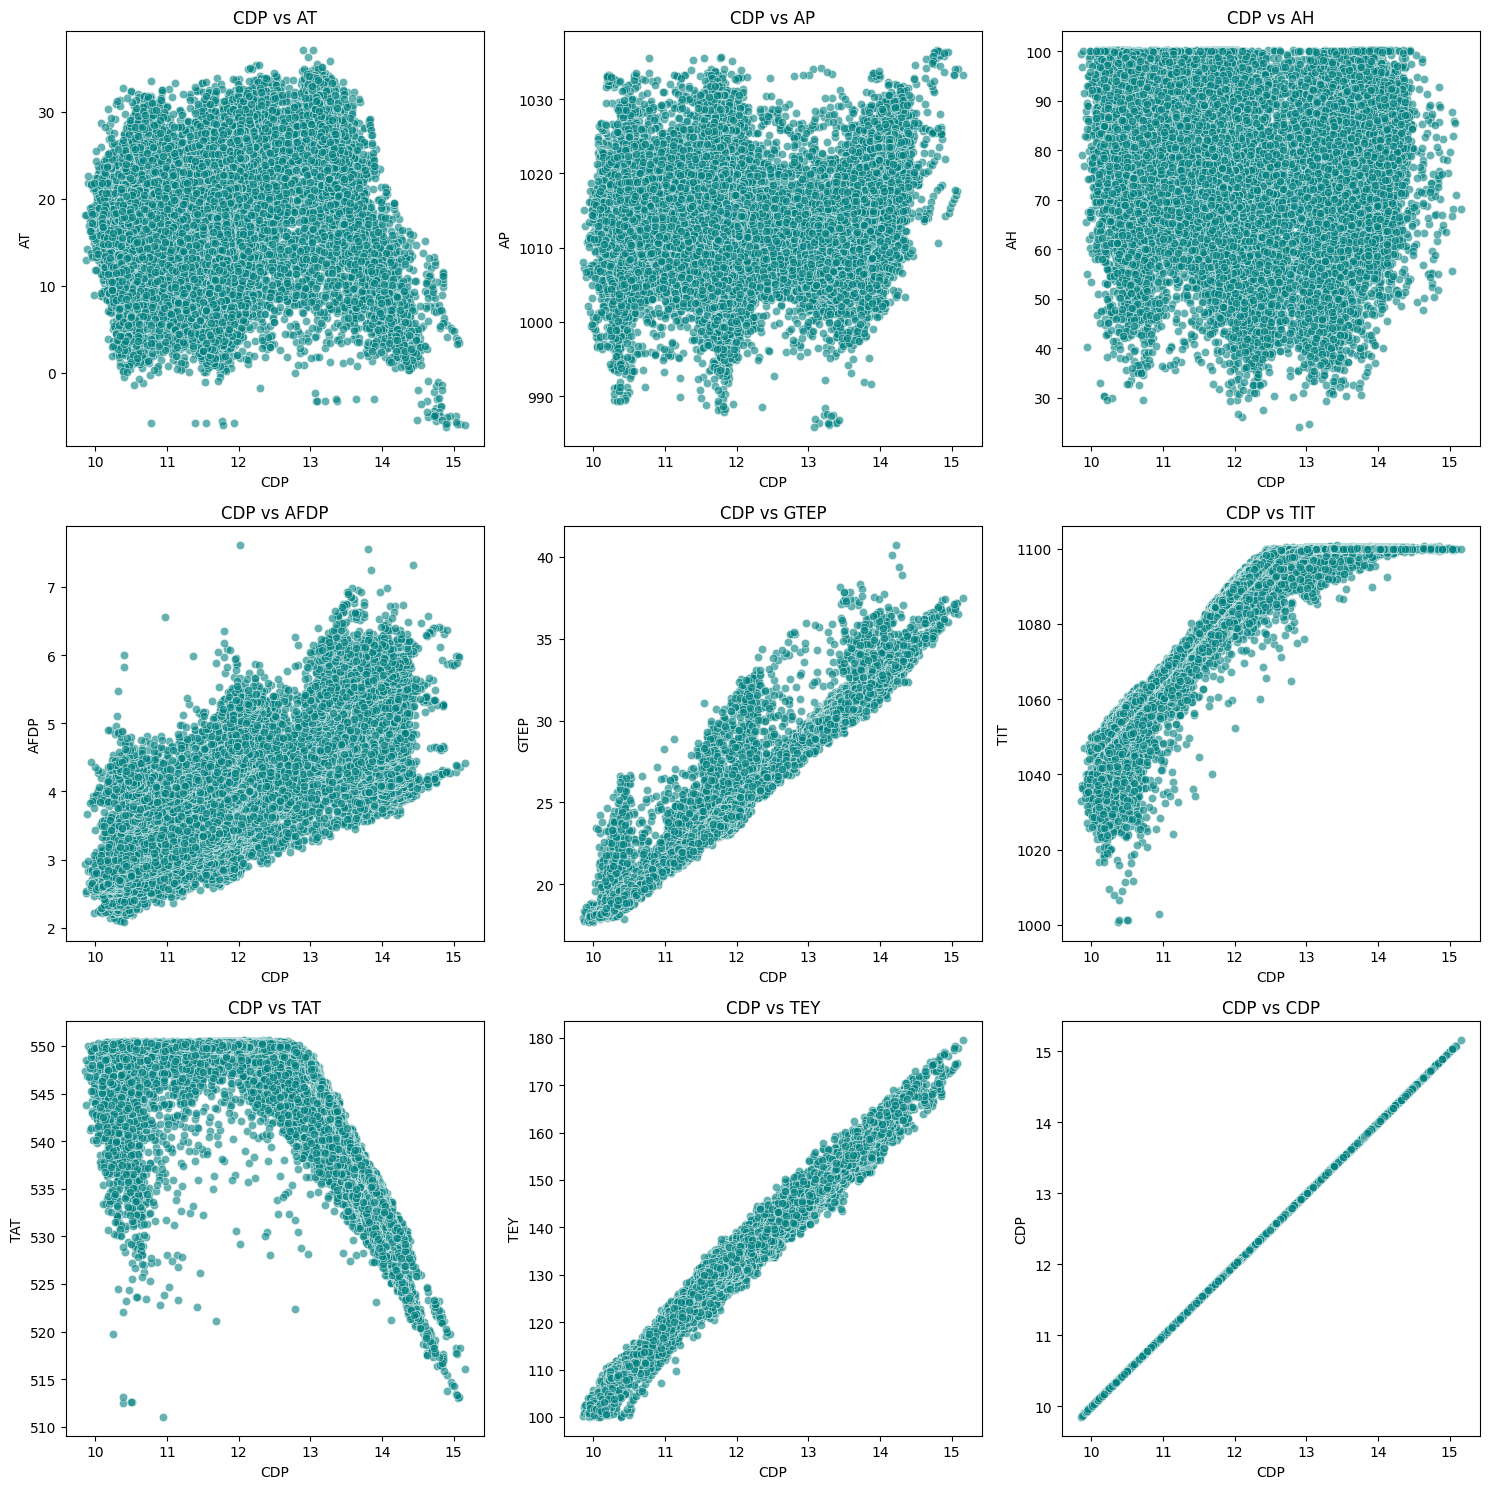

In [ ]:
numeric_data = data.select_dtypes(include='number')
cols = numeric_data.columns

plt.figure(figsize=(15, 15))
for i, col in enumerate(cols[1:10], 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=data, x='CDP', y=col, alpha=0.6, color='teal')
    plt.title(f'CDP vs {col}')
    plt.tight_layout()
plt.show()


## Model Training

###  Common Setup Blocks

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'y' contains multiple targets; pick one (e.g., 'CO' or 'NOx')
target_column = 'CO'  # or 'NOx'
X_model = X.drop(columns=[target_column])
y_model = X[target_column]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import Binarizer

# Function to evaluate model predictions
def evaluate_model(y_true, y_pred, model_name="Model", threshold=0.5):
    # Apply threshold for classification metrics (if needed)
    binarizer = Binarizer(threshold=threshold)
    y_true_bin = binarizer.fit_transform(y_true.values.reshape(-1, 1)).ravel()
    y_pred_bin = binarizer.transform(y_pred.reshape(-1, 1)).ravel()

    acc = accuracy_score(y_true_bin, y_pred_bin)
    prec = precision_score(y_true_bin, y_pred_bin, zero_division=0)
    rec = recall_score(y_true_bin, y_pred_bin, zero_division=0)
    f1 = f1_score(y_true_bin, y_pred_bin, zero_division=0)

    print(f"{model_name} Evaluation:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")

    # Plot
    plt.figure(figsize=(6, 4))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{model_name} Prediction vs Actual")
    plt.grid(True)
    plt.show()


### Regressions

#### Linear Regression

Linear Regression Evaluation:
Accuracy : 0.9307
Precision: 0.9550
Recall   : 0.9723
F1 Score : 0.9636


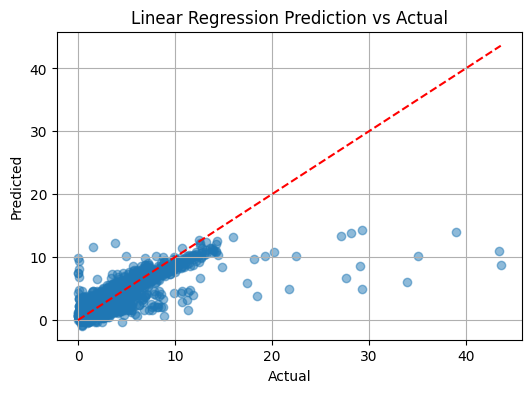

In [ ]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_lr, model_name="Linear Regression")


#### Ridge Regression

Ridge Regression Evaluation:
Accuracy : 0.9307
Precision: 0.9550
Recall   : 0.9723
F1 Score : 0.9636


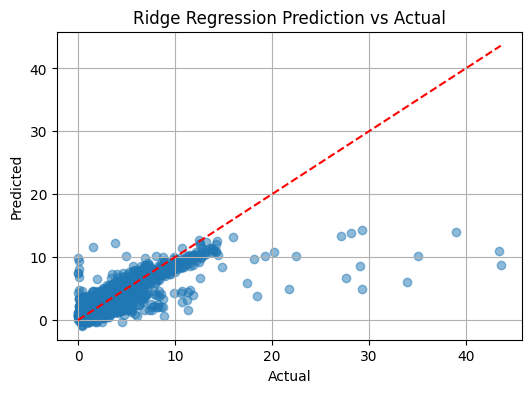

In [ ]:
from sklearn.linear_model import Ridge

# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_ridge, model_name="Ridge Regression")


#### Lasso Regression

Lasso Regression Evaluation:
Accuracy : 0.9408
Precision: 0.9495
Recall   : 0.9899
F1 Score : 0.9693


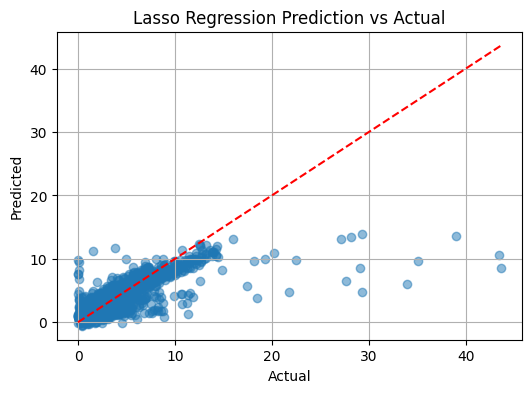

In [ ]:
from sklearn.linear_model import Lasso

# Train Lasso Regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predict
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_lasso, model_name="Lasso Regression")


#### Elastic Net

Elastic Net Evaluation:
Accuracy : 0.9394
Precision: 0.9514
Recall   : 0.9861
F1 Score : 0.9685


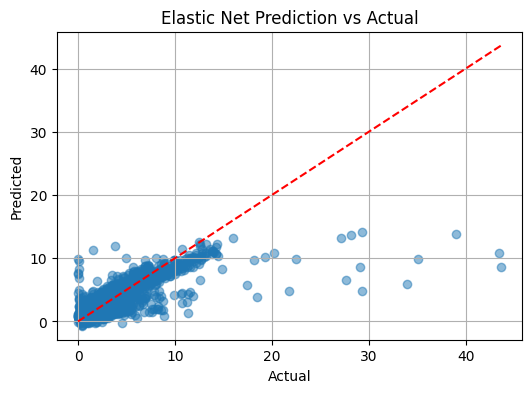

In [ ]:
from sklearn.linear_model import ElasticNet

# Train Elastic Net model
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X_train, y_train)

# Predict
y_pred_elastic = elastic_model.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_elastic, model_name="Elastic Net")


### Trees

#### Decision Tree

Decision Tree Regressor Evaluation:
Accuracy : 0.9430
Precision: 0.9685
Recall   : 0.9711
F1 Score : 0.9698


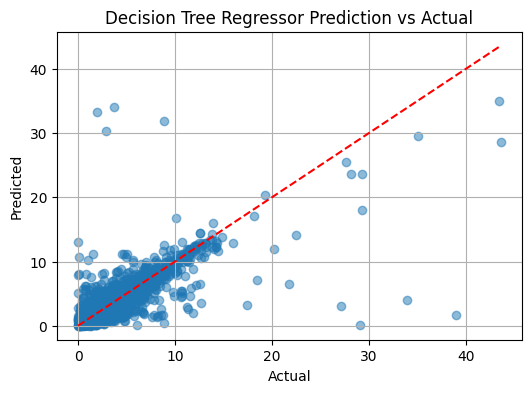

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_dt, model_name="Decision Tree Regressor")


####Random Forest

Random Forest Regressor Evaluation:
Accuracy : 0.9581
Precision: 0.9627
Recall   : 0.9941
F1 Score : 0.9781


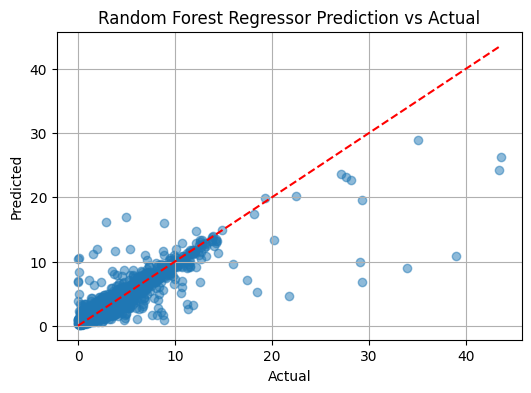

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_rf, model_name="Random Forest Regressor")


#### Extra Trees (Extremely Randomized Trees)

Extra Trees Regressor Evaluation:
Accuracy : 0.9581
Precision: 0.9623
Recall   : 0.9945
F1 Score : 0.9781


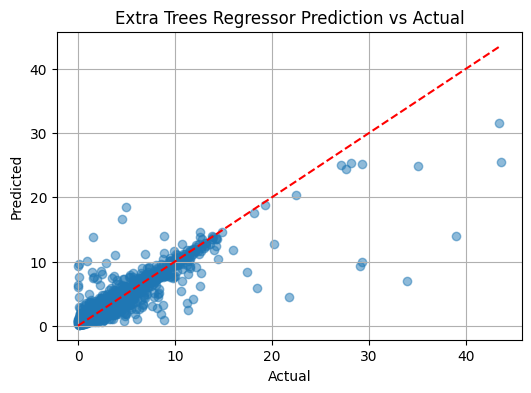

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# Train Extra Trees model
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)

# Predict
y_pred_et = et_model.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_et, model_name="Extra Trees Regressor")


#### Gradient Boosting Machines (GBM)

Gradient Boosting Regressor Evaluation:
Accuracy : 0.9427
Precision: 0.9429
Recall   : 0.9997
F1 Score : 0.9705


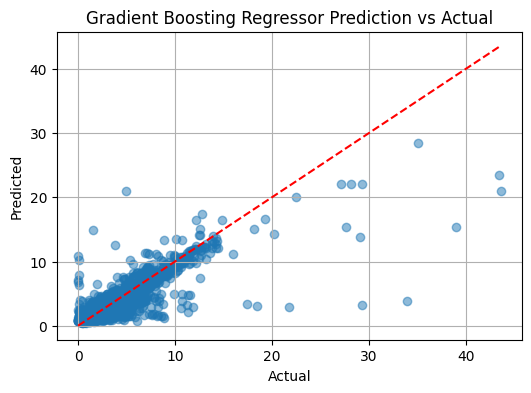

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train, y_train)

# Predict
y_pred_gbm = gbm_model.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_gbm, model_name="Gradient Boosting Regressor")


#### Gradient Boosting Regressor (e.g., XGBoost, LightGBM, CatBoost)

In [ ]:
pip install CatBoost

XGBoost Regressor Evaluation:
Accuracy : 0.9500
Precision: 0.9564
Recall   : 0.9922
F1 Score : 0.9740


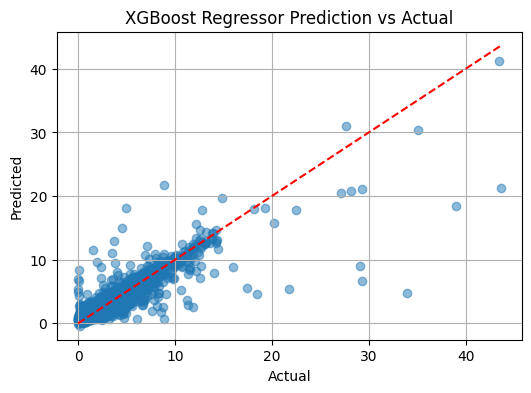

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2556
[LightGBM] [Info] Number of data points in the train set: 29386, number of used features: 11
[LightGBM] [Info] Start training from score 2.373896
LightGBM Regressor Evaluation:
Accuracy : 0.9446
Precision: 0.9450
Recall   : 0.9994
F1 Score : 0.9714


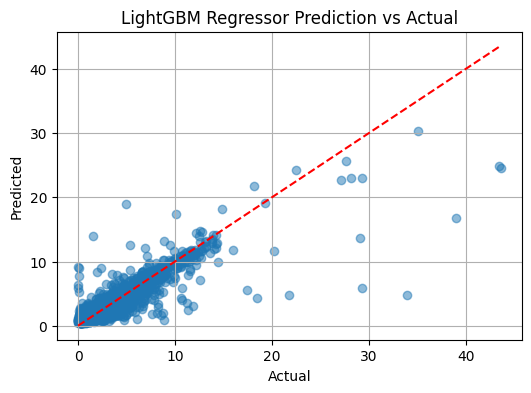

CatBoost Regressor Evaluation:
Accuracy : 0.9500
Precision: 0.9538
Recall   : 0.9952
F1 Score : 0.9741


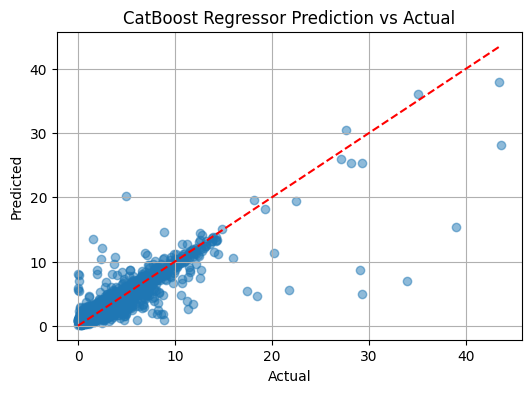

In [ ]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_xgb, model_name="XGBoost Regressor")


from lightgbm import LGBMRegressor

# Train LightGBM model
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)

# Predict
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_lgbm, model_name="LightGBM Regressor")


from catboost import CatBoostRegressor

# Train CatBoost model
cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

# Predict
y_pred_cat = cat_model.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_cat, model_name="CatBoost Regressor")


### Support Vector

#### Support Vector Regressor (SVR)

SVR (Support Vector Regressor) Evaluation:
Accuracy : 0.9428
Precision: 0.9428
Recall   : 1.0000
F1 Score : 0.9706


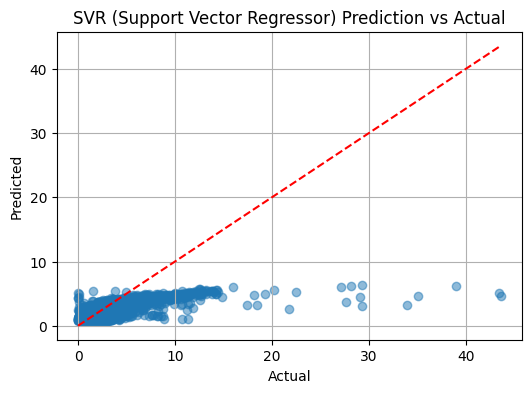

In [ ]:
from sklearn.svm import SVR

# Train SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train.values.ravel())  # flatten y for SVR

# Predict
y_pred_svr = svr_model.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_svr, model_name="SVR (Support Vector Regressor)")


####  SVC (Support Vector Classifier)

SVC (Support Vector Classifier) Evaluation:
Accuracy : 0.7805
Precision: 0.8971
Recall   : 0.6327
F1 Score : 0.7420


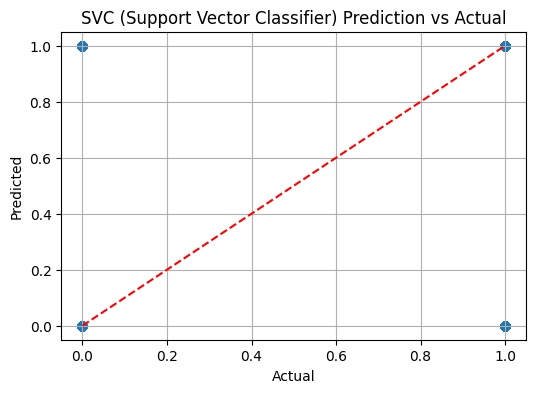

In [ ]:
from sklearn.svm import SVC

# Binarize target for classification
y_class = (y_model >= y_model.median()).astype(int)
y_train_class = (y_train >= y_train.median()).astype(int)
y_test_class = (y_test >= y_train.median()).astype(int)

# Train SVC model
svc_model = SVC(kernel='rbf', probability=True)
svc_model.fit(X_train, y_train_class)

# Predict
y_pred_svc = svc_model.predict(X_test)

# Evaluate
evaluate_model(y_test_class, y_pred_svc, model_name="SVC (Support Vector Classifier)")


####  SVM (Support Vector Machine)

SVM (SVR - Support Vector Regressor) Evaluation:
Accuracy : 0.9428
Precision: 0.9428
Recall   : 1.0000
F1 Score : 0.9706


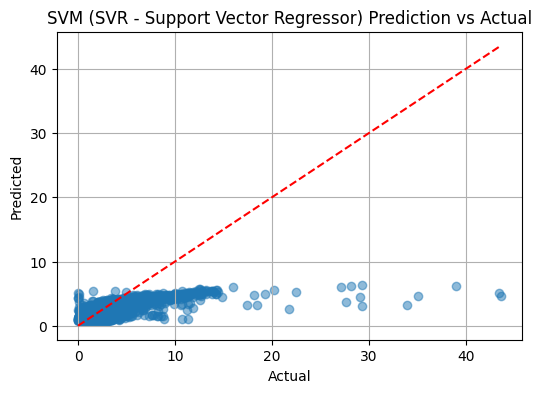

In [ ]:
from sklearn.svm import SVR

# Train SVM model (using SVR)
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_model.fit(X_train, y_train.values.ravel())

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_svm, model_name="SVM (SVR - Support Vector Regressor)")


### MLPs

#### MLPClassifier

MLP Regressor Evaluation:
Accuracy : 0.9424
Precision: 0.9441
Recall   : 0.9980
F1 Score : 0.9703


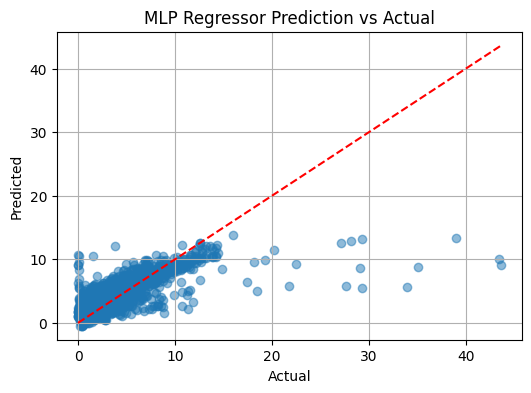

In [ ]:
from sklearn.neural_network import MLPRegressor

# Train MLPRegressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', max_iter=1000, random_state=42)
mlp_reg.fit(X_train, y_train.values.ravel())

# Predict
y_pred_mlp_reg = mlp_reg.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_mlp_reg, model_name="MLP Regressor")


#### MLPRegressor

MLP Classifier Evaluation:
Accuracy : 0.7833
Precision: 0.7943
Recall   : 0.7636
F1 Score : 0.7786


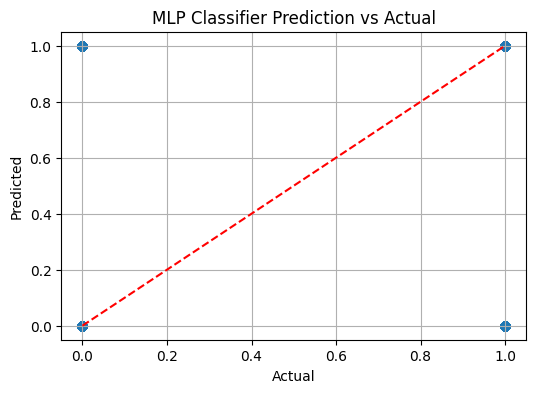

In [ ]:
from sklearn.neural_network import MLPClassifier

# Binarize target (e.g., target >= median → 1)
y_train_cls = (y_train >= y_train.median()).astype(int)
y_test_cls = (y_test >= y_train.median()).astype(int)

# Train MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=1000, random_state=42)
mlp_clf.fit(X_train, y_train_cls)

# Predict
y_pred_mlp_clf = mlp_clf.predict(X_test)

# Evaluate
evaluate_model(y_test_cls, y_pred_mlp_clf, model_name="MLP Classifier")


### Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler

# Scale input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input for CNN/RNN: (samples, timesteps=1, features)
X_train_dl = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_dl = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Convert targets to arrays
y_train_dl = y_train.values
y_test_dl = y_test.values

# Define evaluation for deep models
def evaluate_dl_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test).ravel()
    evaluate_model(pd.Series(y_test), y_pred, model_name=model_name)


#### Convolutional Neural Network (CNN)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CNN Evaluation:
Accuracy : 0.9479
Precision: 0.9548
Recall   : 0.9916
F1 Score : 0.9729


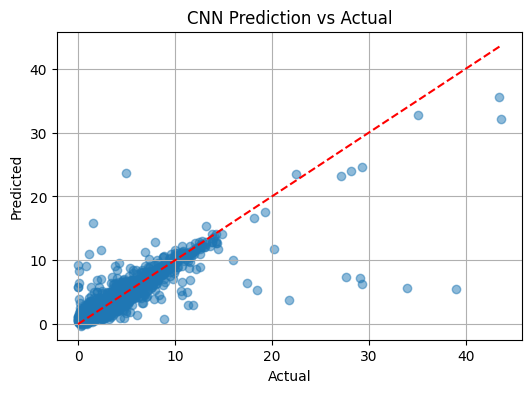

In [ ]:
cnn_model = models.Sequential([
    layers.Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, X_train.shape[1])),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

cnn_model.compile(optimizer='adam', loss='mse')
cnn_model.fit(X_train_dl, y_train_dl, epochs=50, batch_size=32, verbose=0)

evaluate_dl_model(cnn_model, X_test_dl, y_test_dl, "CNN")


#### Recurrent Neural Network (RNN)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
RNN Evaluation:
Accuracy : 0.9490
Precision: 0.9609
Recall   : 0.9860
F1 Score : 0.9733


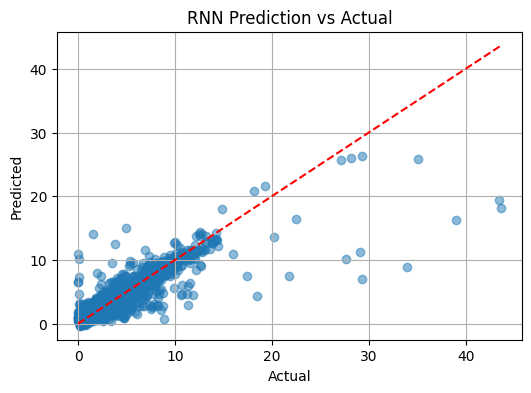

In [ ]:
rnn_model = models.Sequential([
    layers.SimpleRNN(64, activation='tanh', input_shape=(1, X_train.shape[1])),
    layers.Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train_dl, y_train_dl, epochs=50, batch_size=32, verbose=0)

evaluate_dl_model(rnn_model, X_test_dl, y_test_dl, "RNN")


#### Long Short-Term Memory (LSTM)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
LSTM Evaluation:
Accuracy : 0.9479
Precision: 0.9672
Recall   : 0.9779
F1 Score : 0.9725


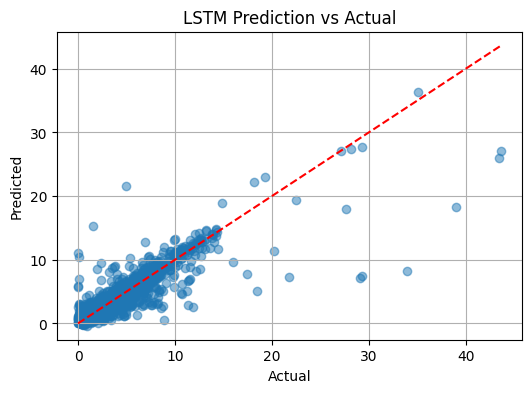

In [ ]:
lstm_model = models.Sequential([
    layers.LSTM(64, input_shape=(1, X_train.shape[1])),
    layers.Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_dl, y_train_dl, epochs=50, batch_size=32, verbose=0)

evaluate_dl_model(lstm_model, X_test_dl, y_test_dl, "LSTM")


#### Gated Recurrent Unit (GRU)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
GRU Evaluation:
Accuracy : 0.9456
Precision: 0.9508
Recall   : 0.9936
F1 Score : 0.9718


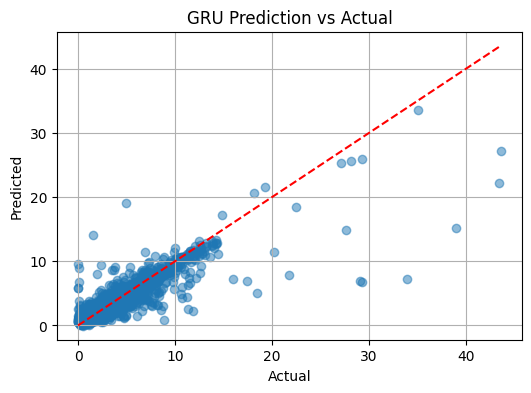

In [ ]:
gru_model = models.Sequential([
    layers.GRU(64, input_shape=(1, X_train.shape[1])),
    layers.Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train_dl, y_train_dl, epochs=50, batch_size=32, verbose=0)

evaluate_dl_model(gru_model, X_test_dl, y_test_dl, "GRU")


#### Transformer

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Transformer Evaluation:
Accuracy : 0.9465
Precision: 0.9478
Recall   : 0.9983
F1 Score : 0.9724


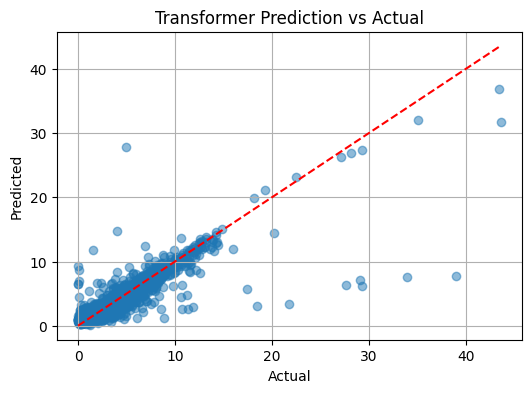

In [ ]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = models.Sequential([
            layers.Dense(ff_dim, activation='relu'),
            layers.Dense(embed_dim)
        ])
        self.layernorm1 = layers.LayerNormalization()
        self.layernorm2 = layers.LayerNormalization()

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        return self.layernorm2(out1 + ffn_output)

input_layer = layers.Input(shape=(1, X_train.shape[1]))
x = TransformerBlock(embed_dim=X_train.shape[1], num_heads=2, ff_dim=64)(input_layer)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1)(x)

transformer_model = models.Model(inputs=input_layer, outputs=output)
transformer_model.compile(optimizer='adam', loss='mse')
transformer_model.fit(X_train_dl, y_train_dl, epochs=50, batch_size=32, verbose=0)

evaluate_dl_model(transformer_model, X_test_dl, y_test_dl, "Transformer")


## Tuning Methods

### Grid Search for RandomForestRegressor

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Random Forest (Grid Search) Evaluation:
Accuracy : 0.9581
Precision: 0.9624
Recall   : 0.9944
F1 Score : 0.9781


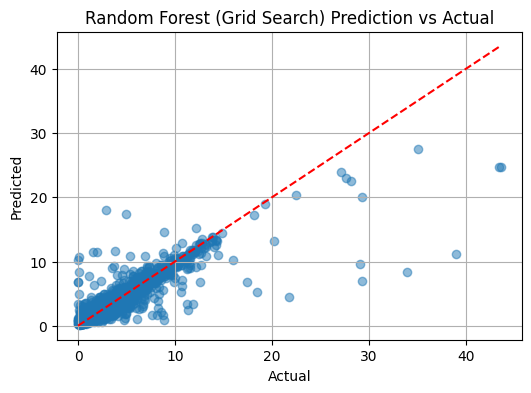

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Grid Search
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=param_grid_rf,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

grid_rf.fit(X_train, y_train.values.ravel())

# Best model
best_rf = grid_rf.best_estimator_

# Predict and evaluate
y_pred_rf_grid = best_rf.predict(X_test)
evaluate_model(y_test, y_pred_rf_grid, model_name="Random Forest (Grid Search)")


### Randomized Search for RandomForestRegressor

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Random Forest (Random Search) Evaluation:
Accuracy : 0.9578
Precision: 0.9620
Recall   : 0.9945
F1 Score : 0.9780


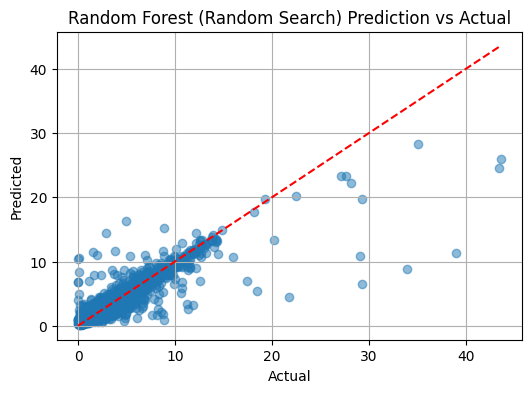

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Parameter distributions
param_dist_rf = {
    'n_estimators': randint(50, 300),
    'max_depth': [None] + list(range(5, 30, 5)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Randomized Search
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=20,  # number of combinations to try
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_rf.fit(X_train, y_train.values.ravel())

# Best model
best_rf_random = random_search_rf.best_estimator_

# Predict and evaluate
y_pred_rf_random = best_rf_random.predict(X_test)
evaluate_model(y_test, y_pred_rf_random, model_name="Random Forest (Random Search)")


#### Visualization

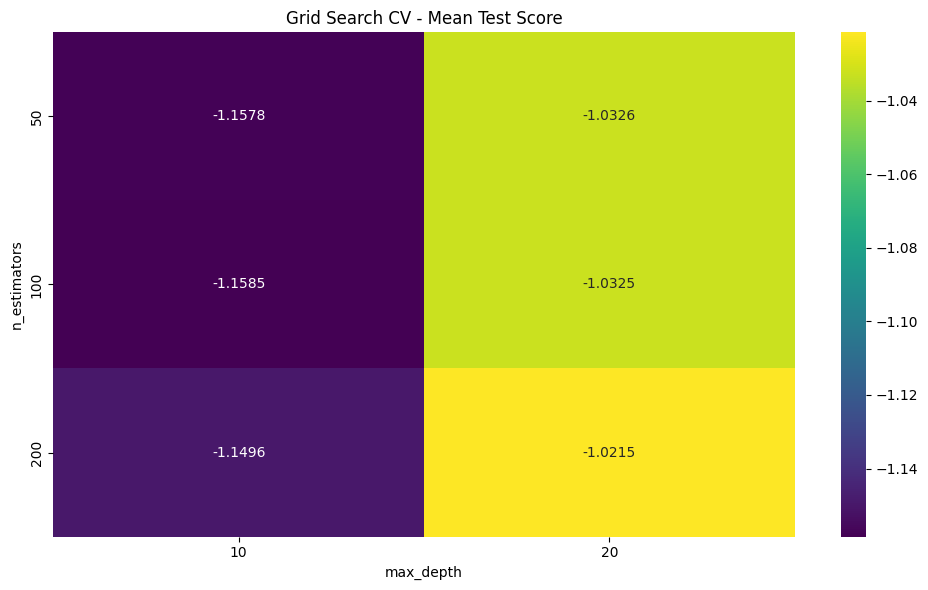

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert results to DataFrame
results_df = pd.DataFrame(grid_rf.cv_results_)

# Focus on mean test score and relevant params
scores_matrix = results_df.pivot_table(
    values='mean_test_score',
    index='param_n_estimators',
    columns='param_max_depth'
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(scores_matrix, annot=True, fmt=".4f", cmap='viridis')
plt.title("Grid Search CV - Mean Test Score")
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.tight_layout()
plt.show()


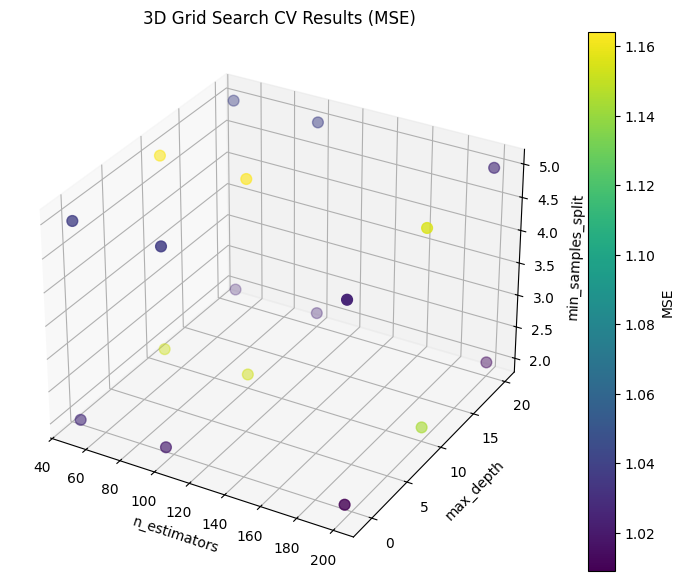

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Extract scores and parameters
df_3d = results_df.copy()
df_3d['mean_test_score'] = -df_3d['mean_test_score']  # convert neg MSE to MSE

# Create 3D scatter
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

df_3d['param_max_depth'] = df_3d['param_max_depth'].apply(lambda x: -1 if x is None else int(x))
df_3d['param_n_estimators'] = df_3d['param_n_estimators'].astype(int)
df_3d['param_min_samples_split'] = df_3d['param_min_samples_split'].astype(int)

x = df_3d['param_n_estimators'].astype(int)
y = df_3d['param_max_depth'].astype(int)
z = df_3d['param_min_samples_split'].astype(int)
c = df_3d['mean_test_score']

sc = ax.scatter(x, y, z, c=c, cmap='viridis', s=60)
ax.set_xlabel('n_estimators')
ax.set_ylabel('max_depth')
ax.set_zlabel('min_samples_split')
plt.title("3D Grid Search CV Results (MSE)")
fig.colorbar(sc, label='MSE')
plt.show()


In [ ]:
results_df.sort_values("mean_test_score", ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,120.741313,1.479455,0.820134,0.213950,None,2,200,"{'max_depth': None, 'min_samples_split': 2, 'n...",-0.787936,-0.720224,-0.919539,-1.588455,-1.028674,-1.008966,0.308681,1
14,106.116411,1.397274,0.604485,0.187822,20,2,200,"{'max_depth': 20, 'min_samples_split': 2, 'n_e...",-0.788337,-0.722834,-0.926408,-1.593494,-1.041923,-1.014599,0.309827,2
1,60.969610,0.755198,0.408851,0.129591,None,2,100,"{'max_depth': None, 'min_samples_split': 2, 'n...",-0.810615,-0.727209,-0.926416,-1.610544,-1.028770,-1.020711,0.312136,3
12,25.921121,0.145403,0.114953,0.003163,20,2,50,"{'max_depth': 20, 'min_samples_split': 2, 'n_e...",-0.812531,-0.736854,-0.901929,-1.607454,-1.066109,-1.024976,0.311211,4
13,52.379111,0.675712,0.286017,0.099545,20,2,100,"{'max_depth': 20, 'min_samples_split': 2, 'n_e...",-0.809612,-0.725118,-0.931860,-1.616832,-1.043412,-1.025367,0.314833,5


### Bayesian Optimization with RandomForestRegressor

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter space
param_space = {
    'n_estimators': Integer(50, 300),
    'max_depth': Integer(5, 30),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 5),
    'max_features': Categorical(['auto', 'sqrt', 'log2'])
}

# Define BayesSearchCV
opt_rf = BayesSearchCV(
    estimator=rf,
    search_spaces=param_space,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit model
opt_rf.fit(X_train, y_train.values.ravel())

# Best model
best_rf_bayes = opt_rf.best_estimator_

# Predict and evaluate
y_pred_rf_bayes = best_rf_bayes.predict(X_test)
evaluate_model(y_test, y_pred_rf_bayes, model_name="Random Forest (Bayesian Optimization)")


ModuleNotFoundError: No module named 'skopt'

### Optuna Example (for RandomForestRegressor)

In [ ]:
pip install optuna hyperopt


In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    model.fit(X_train, y_train.values.ravel())
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    return mse

# Run optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

# Retrieve best model
best_params = study.best_params
best_model_optuna = RandomForestRegressor(**best_params, random_state=42)
best_model_optuna.fit(X_train, y_train.values.ravel())
y_pred_optuna = best_model_optuna.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_optuna, model_name="Random Forest (Optuna)")


### Hyperopt

In [ ]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define search space
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 1),
    'max_depth': hp.quniform('max_depth', 5, 30, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 5, 1),
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2']),
}

# Objective function
def objective(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    params['min_samples_split'] = int(params['min_samples_split'])
    params['min_samples_leaf'] = int(params['min_samples_leaf'])

    model = RandomForestRegressor(**params, random_state=42)
    model.fit(X_train, y_train.values.ravel())
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    return {'loss': mse, 'status': STATUS_OK}

# Run Hyperopt
trials = Trials()
best_params_hyperopt = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=30,
    trials=trials,
    rstate=np.random.default_rng(42)
)

# Rebuild model with best params
best_params_hyperopt['max_features'] = ['auto', 'sqrt', 'log2'][best_params_hyperopt['max_features']]
best_model_hyperopt = RandomForestRegressor(
    **{k: int(v) if k != 'max_features' else v for k, v in best_params_hyperopt.items()},
    random_state=42
)
best_model_hyperopt.fit(X_train, y_train.values.ravel())
y_pred_hyperopt = best_model_hyperopt.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_hyperopt, model_name="Random Forest (Hyperopt)")
